# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
! pip install Pillow

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [3]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 10.80 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (6/6), done.


In [4]:
!ls MNIST

processed  raw


In [5]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [6]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

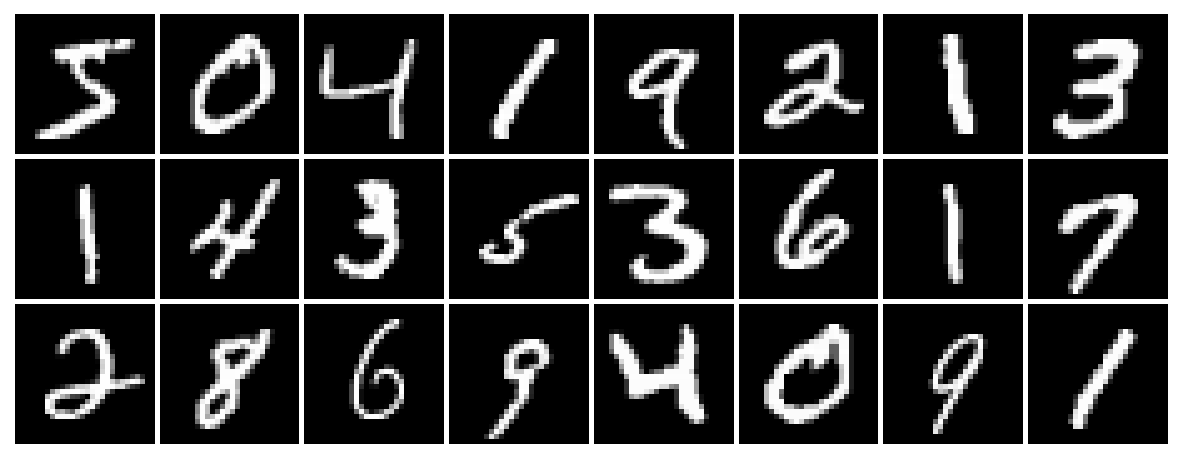

In [7]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


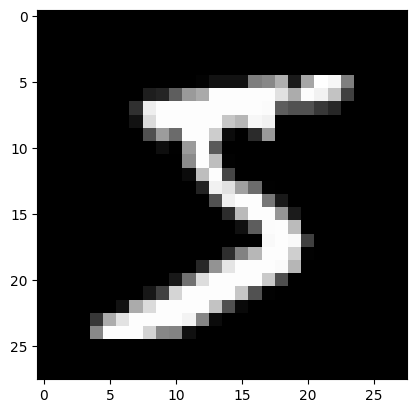

In [8]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [9]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [10]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[ 0.0905,  0.2037,  0.3876, -0.1276, -0.0731, -0.2946,  0.0549,  0.2316,
          0.0322, -0.0661],
        [ 0.1069,  0.2035, -0.1377, -0.0540,  0.1437,  0.2210, -0.0720, -0.0525,
          0.3092,  0.0049],
        [ 0.2152,  0.2222,  0.1397,  0.1652,  0.0975, -0.0375, -0.0743,  0.1007,
          0.1457,  0.1552],
        [ 0.1740, -0.3018,  0.0452, -0.2238,  0.2033, -0.2155, -0.0922, -0.1003,
         -0.0544, -0.1050],
        [ 0.2843,  0.0330,  0.0134,  0.1075,  0.0684, -0.1192,  0.0344,  0.2995,
          0.1417, -0.0277]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [11]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [12]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-cfz41e_r
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-cfz41e_r
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━

In [13]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.3092, grad_fn=<NllLossBackward0>)

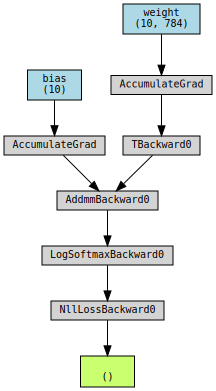

In [14]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [15]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()


In [16]:
print('Final loss:', loss.item())

Final loss: 0.2652428448200226


### Visualizando gráfico de perda durante o treinamento

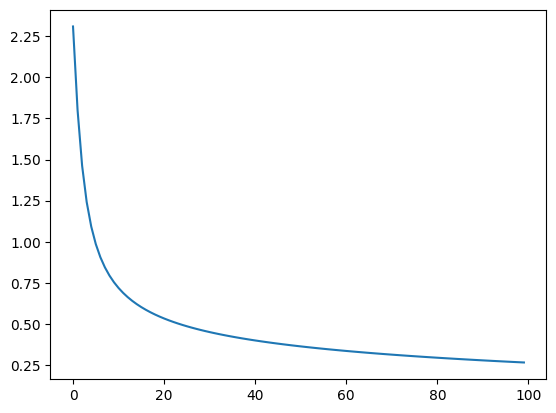

In [17]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [18]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.942


### Matriz de confusão com dados de treinamento e teste

In [19]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,110,2,0,0,0,2,3,1,0
2,0,1,90,1,0,1,0,1,1,1
3,0,0,0,88,0,2,0,0,0,0
4,0,0,1,0,102,2,1,1,0,3
5,0,2,0,1,0,82,0,0,2,1
6,1,0,1,1,2,2,90,0,0,0
7,0,1,1,1,0,0,0,111,0,3
8,0,2,2,0,0,1,0,0,83,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


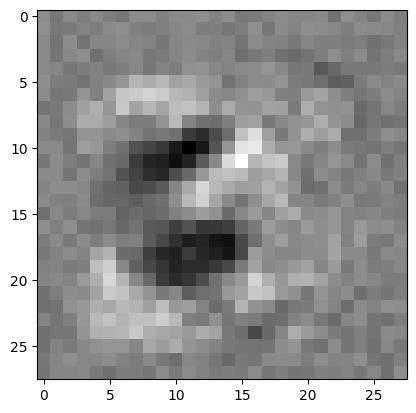

In [20]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

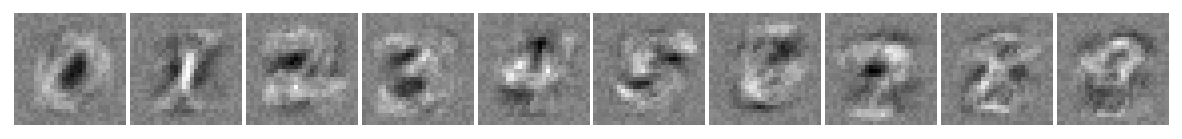

In [21]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

Época [1/100], Perda: 0.1340, Acurácia: 0.9790

Gradientes para a classe do dígito 4 na época 1:


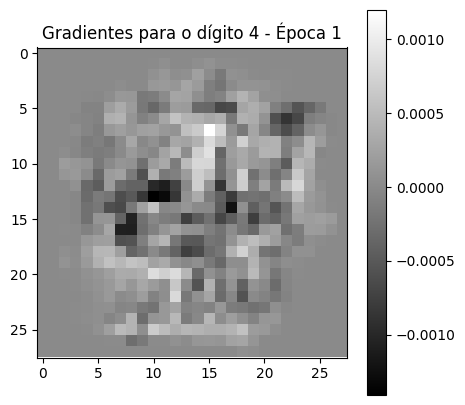

Época [2/100], Perda: 0.1336, Acurácia: 0.9790
Época [3/100], Perda: 0.1333, Acurácia: 0.9790
Época [4/100], Perda: 0.1330, Acurácia: 0.9790
Época [5/100], Perda: 0.1326, Acurácia: 0.9790
Época [6/100], Perda: 0.1323, Acurácia: 0.9790
Época [7/100], Perda: 0.1320, Acurácia: 0.9790
Época [8/100], Perda: 0.1316, Acurácia: 0.9790
Época [9/100], Perda: 0.1313, Acurácia: 0.9790
Época [10/100], Perda: 0.1310, Acurácia: 0.9790

Gradientes para a classe do dígito 4 na época 10:


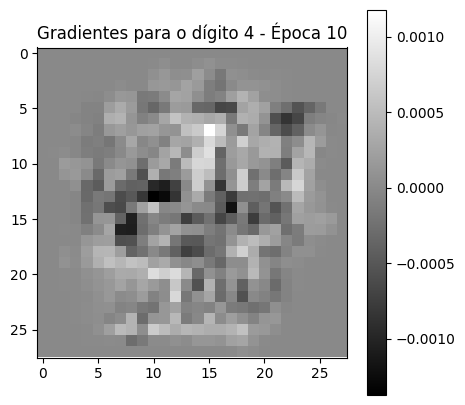

Época [11/100], Perda: 0.1307, Acurácia: 0.9790
Época [12/100], Perda: 0.1303, Acurácia: 0.9790
Época [13/100], Perda: 0.1300, Acurácia: 0.9790
Época [14/100], Perda: 0.1297, Acurácia: 0.9790
Época [15/100], Perda: 0.1294, Acurácia: 0.9790
Época [16/100], Perda: 0.1290, Acurácia: 0.9790
Época [17/100], Perda: 0.1287, Acurácia: 0.9790
Época [18/100], Perda: 0.1284, Acurácia: 0.9790
Época [19/100], Perda: 0.1281, Acurácia: 0.9790
Época [20/100], Perda: 0.1278, Acurácia: 0.9790

Gradientes para a classe do dígito 4 na época 20:


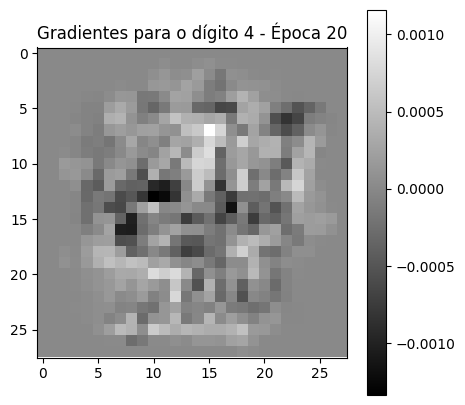

Época [21/100], Perda: 0.1275, Acurácia: 0.9790
Época [22/100], Perda: 0.1272, Acurácia: 0.9790
Época [23/100], Perda: 0.1269, Acurácia: 0.9790
Época [24/100], Perda: 0.1266, Acurácia: 0.9790
Época [25/100], Perda: 0.1263, Acurácia: 0.9790
Época [26/100], Perda: 0.1259, Acurácia: 0.9790
Época [27/100], Perda: 0.1256, Acurácia: 0.9790
Época [28/100], Perda: 0.1253, Acurácia: 0.9790
Época [29/100], Perda: 0.1250, Acurácia: 0.9800
Época [30/100], Perda: 0.1247, Acurácia: 0.9800

Gradientes para a classe do dígito 4 na época 30:


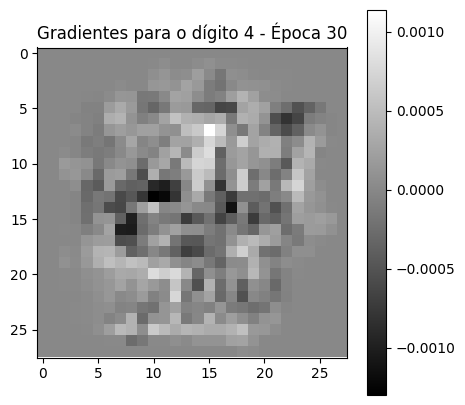

Época [31/100], Perda: 0.1244, Acurácia: 0.9800
Época [32/100], Perda: 0.1242, Acurácia: 0.9800
Época [33/100], Perda: 0.1239, Acurácia: 0.9820
Época [34/100], Perda: 0.1236, Acurácia: 0.9820
Época [35/100], Perda: 0.1233, Acurácia: 0.9820
Época [36/100], Perda: 0.1230, Acurácia: 0.9820
Época [37/100], Perda: 0.1227, Acurácia: 0.9820
Época [38/100], Perda: 0.1224, Acurácia: 0.9820
Época [39/100], Perda: 0.1221, Acurácia: 0.9820
Época [40/100], Perda: 0.1218, Acurácia: 0.9830

Gradientes para a classe do dígito 4 na época 40:


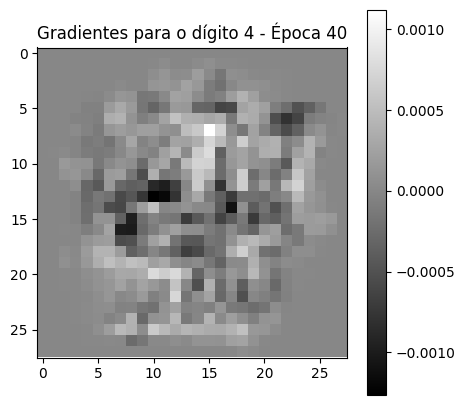

Época [41/100], Perda: 0.1215, Acurácia: 0.9830
Época [42/100], Perda: 0.1213, Acurácia: 0.9830
Época [43/100], Perda: 0.1210, Acurácia: 0.9830
Época [44/100], Perda: 0.1207, Acurácia: 0.9830
Época [45/100], Perda: 0.1204, Acurácia: 0.9850
Época [46/100], Perda: 0.1201, Acurácia: 0.9850
Época [47/100], Perda: 0.1199, Acurácia: 0.9850
Época [48/100], Perda: 0.1196, Acurácia: 0.9850
Época [49/100], Perda: 0.1193, Acurácia: 0.9850
Época [50/100], Perda: 0.1190, Acurácia: 0.9850

Gradientes para a classe do dígito 4 na época 50:


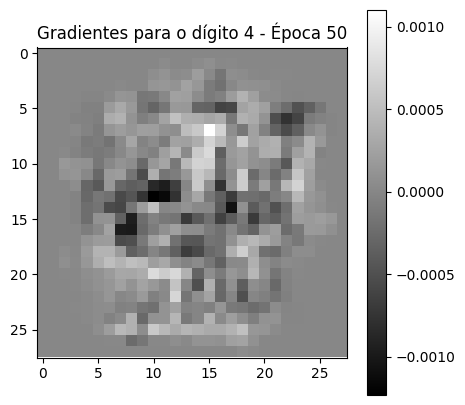

Época [51/100], Perda: 0.1188, Acurácia: 0.9850
Época [52/100], Perda: 0.1185, Acurácia: 0.9850
Época [53/100], Perda: 0.1182, Acurácia: 0.9850
Época [54/100], Perda: 0.1179, Acurácia: 0.9850
Época [55/100], Perda: 0.1177, Acurácia: 0.9850
Época [56/100], Perda: 0.1174, Acurácia: 0.9850
Época [57/100], Perda: 0.1171, Acurácia: 0.9870
Época [58/100], Perda: 0.1169, Acurácia: 0.9870
Época [59/100], Perda: 0.1166, Acurácia: 0.9870
Época [60/100], Perda: 0.1163, Acurácia: 0.9870

Gradientes para a classe do dígito 4 na época 60:


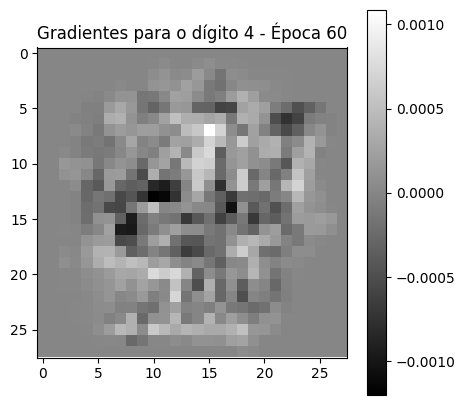

Época [61/100], Perda: 0.1161, Acurácia: 0.9870
Época [62/100], Perda: 0.1158, Acurácia: 0.9870
Época [63/100], Perda: 0.1156, Acurácia: 0.9870
Época [64/100], Perda: 0.1153, Acurácia: 0.9870
Época [65/100], Perda: 0.1150, Acurácia: 0.9870
Época [66/100], Perda: 0.1148, Acurácia: 0.9870
Época [67/100], Perda: 0.1145, Acurácia: 0.9880
Época [68/100], Perda: 0.1143, Acurácia: 0.9880
Época [69/100], Perda: 0.1140, Acurácia: 0.9880
Época [70/100], Perda: 0.1138, Acurácia: 0.9880

Gradientes para a classe do dígito 4 na época 70:


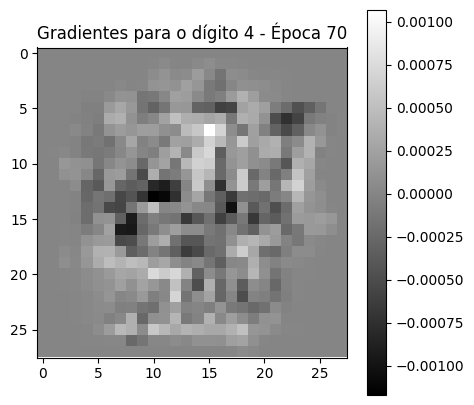

Época [71/100], Perda: 0.1135, Acurácia: 0.9890
Época [72/100], Perda: 0.1133, Acurácia: 0.9890
Época [73/100], Perda: 0.1130, Acurácia: 0.9890
Época [74/100], Perda: 0.1128, Acurácia: 0.9890
Época [75/100], Perda: 0.1125, Acurácia: 0.9890
Época [76/100], Perda: 0.1123, Acurácia: 0.9890
Época [77/100], Perda: 0.1120, Acurácia: 0.9890
Época [78/100], Perda: 0.1118, Acurácia: 0.9890
Época [79/100], Perda: 0.1115, Acurácia: 0.9890
Época [80/100], Perda: 0.1113, Acurácia: 0.9890

Gradientes para a classe do dígito 4 na época 80:


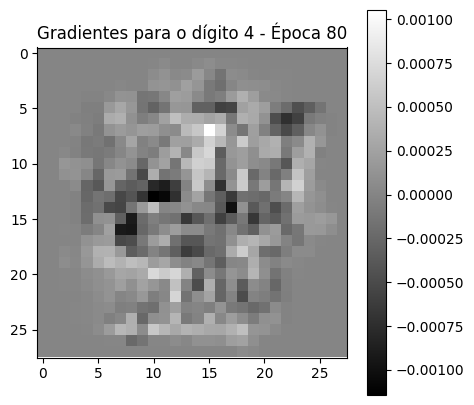

Época [81/100], Perda: 0.1110, Acurácia: 0.9890
Época [82/100], Perda: 0.1108, Acurácia: 0.9890
Época [83/100], Perda: 0.1106, Acurácia: 0.9900
Época [84/100], Perda: 0.1103, Acurácia: 0.9900
Época [85/100], Perda: 0.1101, Acurácia: 0.9900
Época [86/100], Perda: 0.1098, Acurácia: 0.9900
Época [87/100], Perda: 0.1096, Acurácia: 0.9900
Época [88/100], Perda: 0.1094, Acurácia: 0.9900
Época [89/100], Perda: 0.1091, Acurácia: 0.9900
Época [90/100], Perda: 0.1089, Acurácia: 0.9900

Gradientes para a classe do dígito 4 na época 90:


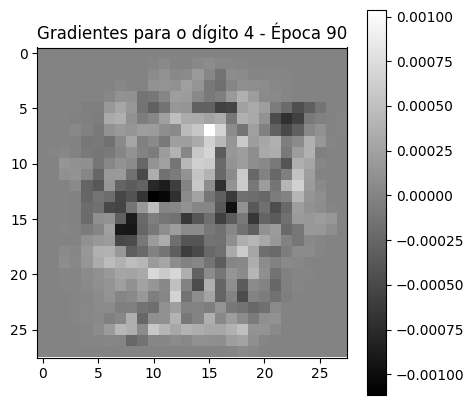

Época [91/100], Perda: 0.1087, Acurácia: 0.9900
Época [92/100], Perda: 0.1084, Acurácia: 0.9900
Época [93/100], Perda: 0.1082, Acurácia: 0.9900
Época [94/100], Perda: 0.1080, Acurácia: 0.9900
Época [95/100], Perda: 0.1078, Acurácia: 0.9900
Época [96/100], Perda: 0.1075, Acurácia: 0.9900
Época [97/100], Perda: 0.1073, Acurácia: 0.9900
Época [98/100], Perda: 0.1071, Acurácia: 0.9900
Época [99/100], Perda: 0.1068, Acurácia: 0.9900
Época [100/100], Perda: 0.1066, Acurácia: 0.9900

Gradientes para a classe do dígito 4 na época 100:


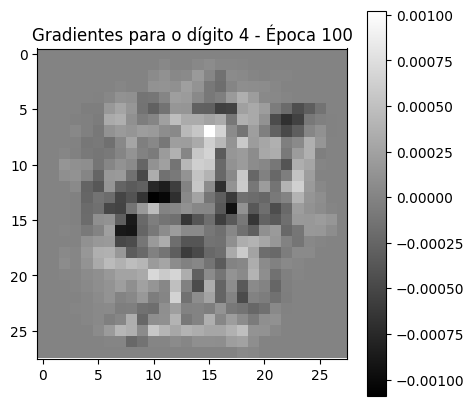

Perda final: 0.10661672800779343


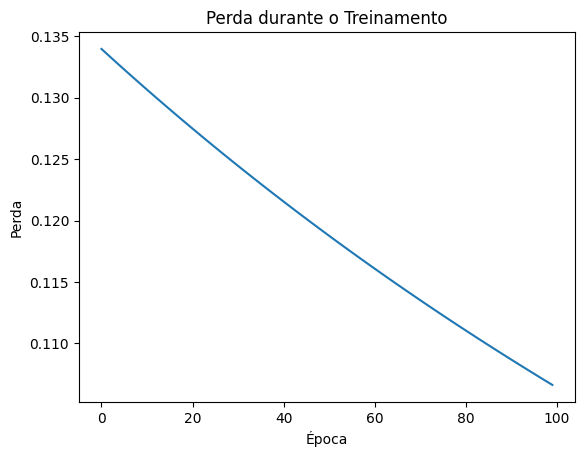

In [30]:
epochs = 100
learningRate = 0.5

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

losses = []
zs = []

for epoca in range(epochs):
    # forward
    inputs = Variable(x_train.view(-1, 28 * 28))
    outputs = model(inputs)

    # Calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # Backward pass e otimização
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Armazena a perda
    losses.append(loss.item())

    # Calcula a acurácia
    _, predicts = torch.max(outputs, 1)
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    # 1) Imprime informações da época
    print(f'Época [{epoca+1}/{epochs}], Perda: {loss.item():.4f}, Acurácia: {accuracy:.4f}')

    # 2) Visualização dos gradientes para a classe do dígito 4
    if epoca == 0 or (epoca+1) % 10 == 0 or epoca == epochs-1:  # Mostra a cada 10 épocas e na última
        print(f"\nGradientes para a classe do dígito 4 na época {epoca+1}:")
        # Obtém os gradientes para os pesos correspondentes ao dígito 4 (classe 4)
        grad_4 = model.weight.grad[4].detach().numpy().reshape(28, 28)
        plt.figure(figsize=(5,5))
        plt.imshow(grad_4, cmap='gray')
        plt.title(f'Gradientes para o dígito 4 - Época {epoca+1}')
        plt.colorbar()
        plt.show()

    # Armazena saídas para o dígito 1 (opcional)
    zs.append(outputs[1].detach().numpy())

print('Perda final:', loss.item())

plt.plot(losses)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Perda durante o Treinamento')
plt.show()

<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
2. Qual é o shape da saída da rede?
3. Qual é o número total de parâmetros da rede, incluindo o bias?

# Aprendizados
